In [26]:
import pandas as pd
import numpy as np
df=pd.read_csv('startup_cleaned.csv')

NameError: name 'plt' is not defined

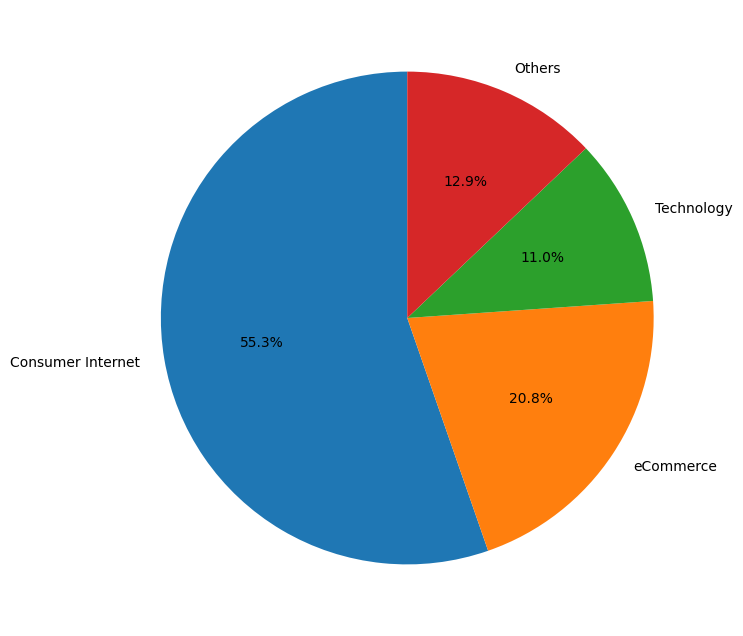

In [13]:
data = df[df['investors'].str.contains('IDG Ventures', na=False)] \
           .groupby('vertical')['amount'].sum()

# Group small values
threshold = data.sum() * 0.05  # group anything <5% into "Others"
data = data.sort_values(ascending=False)
others = data[data < threshold].sum()
data = data[data >= threshold]
if others > 0:
    data['Others'] = others

# Plot pie
data.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), ylabel='')
plt.title('Investment Distribution by Vertical (IDG Ventures)')
plt.tight_layout()
plt.show()

In [14]:
df.isnull().sum()

Sr No            0
date             2
startup          0
vertical       171
subvertical    925
city           180
investors       24
round            2
amount           0
dtype: int64

In [27]:
df.dropna(subset=['investors'])

,Sr No,date,startup,vertical,subvertical,city,investors,round,amount
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000
...,...,...,...,...,...,...,...,...,...
3024,3040,2015-01-29,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,37.125000
3025,3041,2015-01-29,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,6.806250
3026,3042,2015-01-30,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,12.375000
3027,3043,2015-01-30,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,0.000000


In [28]:
df.isnull().sum()

Sr No            0
date             2
startup          0
vertical       171
subvertical    925
city           180
investors       24
round            2
amount           0
dtype: int64

In [29]:
df = df.dropna(subset=['investors', 'vertical', 'city'])


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2825 entries, 0 to 2857
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sr No        2825 non-null   int64  
 1   date         2824 non-null   object 
 2   startup      2825 non-null   object 
 3   vertical     2825 non-null   object 
 4   subvertical  2080 non-null   object 
 5   city         2825 non-null   object 
 6   investors    2825 non-null   object 
 7   round        2823 non-null   object 
 8   amount       2825 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 220.7+ KB


In [31]:
df['subvertical'] = df['subvertical'].fillna('Not Specified')

In [33]:
round_df = df[df['investors'].str.contains('Tiger Global Management', na=False)].groupby('round')['amount'].sum()

In [42]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2825 entries, 0 to 2857
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sr No        2825 non-null   int64         
 1   date         2824 non-null   datetime64[ns]
 2   startup      2825 non-null   object        
 3   vertical     2825 non-null   object        
 4   subvertical  2825 non-null   object        
 5   city         2825 non-null   object        
 6   investors    2825 non-null   object        
 7   round        2823 non-null   object        
 8   amount       2825 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 220.7+ KB


In [49]:
df['year'] = df['date'].dt.year

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2825 entries, 0 to 2857
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sr No        2825 non-null   int64         
 1   date         2824 non-null   datetime64[ns]
 2   startup      2825 non-null   object        
 3   vertical     2825 non-null   object        
 4   subvertical  2825 non-null   object        
 5   city         2825 non-null   object        
 6   investors    2825 non-null   object        
 7   round        2823 non-null   object        
 8   amount       2825 non-null   float64       
 9   year         2824 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 242.8+ KB


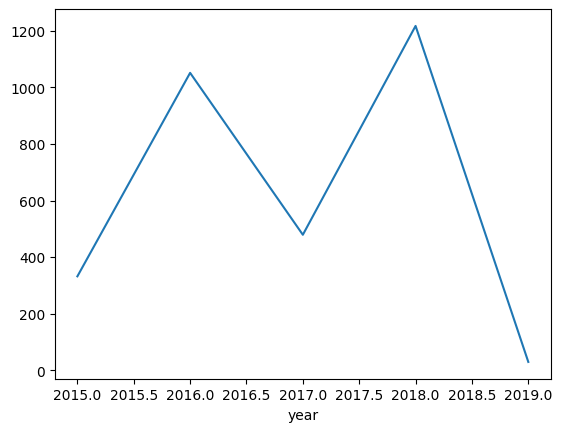

In [51]:
year_df = df[df['investors'].str.contains('IDG Ventures', na=False)].groupby('year')['amount'].sum().plot()

In [67]:
maximum=df.groupby('startup')['amount'].max().sort_values(ascending=False).head(1).values[0]

In [65]:
type(max)

builtin_function_or_method

In [76]:
type(str(df[df['amount']==maximum]['startup']))

str

In [ ]:
df.groupby('startup')['amount'].count()

np.float64(129.51650463238488)